In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\Users\LIN\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LIN\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\LIN\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.
C:\Users\LIN\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LIN\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (ty

In [2]:
y_train_label=np.loadtxt('label.txt',delimiter=",")
x_Train=np.loadtxt('feature.txt',delimiter=",")

In [3]:
y_test_label=np.loadtxt('test_label.txt',delimiter=",")
x_Test=np.loadtxt('test_feature.txt',delimiter=",")

#NORMALIZE

In [4]:
x_Train_normalize=[]
for i in x_Train:
    new_i = i/10000
    x_Train_normalize.append(new_i)
x_Train_normalize=np.array(x_Train_normalize)

In [5]:
x_Test_normalize=[]
for i in x_Test:
    new_i = i/10000
    x_Test_normalize.append(new_i)
x_Test_normalize=np.array(x_Test_normalize)

In [6]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

#建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

In [9]:
model.add(Dense(units=500, 
                input_dim=1001, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
model.add(Dense(units=500, 
                kernel_initializer='normal', 
                activation='relu'))

In [11]:
model.add(Dense(units=100, 
                kernel_initializer='normal', 
                activation='softmax'))

In [12]:
model.add(Dense(units=2, 
                kernel_initializer='normal', 
                activation='softmax'))

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               501000    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 801,802
Trainable params: 801,802
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [15]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 472 samples, validate on 118 samples
Epoch 1/10
 - 0s - loss: 0.6890 - acc: 0.5763 - val_loss: 0.6792 - val_acc: 0.8220
Epoch 2/10
 - 0s - loss: 0.6699 - acc: 1.0000 - val_loss: 0.6693 - val_acc: 0.8220
Epoch 3/10
 - 0s - loss: 0.6494 - acc: 1.0000 - val_loss: 0.6534 - val_acc: 0.8220
Epoch 4/10
 - 0s - loss: 0.6268 - acc: 1.0000 - val_loss: 0.6455 - val_acc: 0.8220
Epoch 5/10
 - 0s - loss: 0.6138 - acc: 1.0000 - val_loss: 0.6369 - val_acc: 0.8220
Epoch 6/10
 - 0s - loss: 0.6011 - acc: 1.0000 - val_loss: 0.6291 - val_acc: 0.8220
Epoch 7/10
 - 0s - loss: 0.5915 - acc: 1.0000 - val_loss: 0.6249 - val_acc: 0.8220
Epoch 8/10
 - 0s - loss: 0.5843 - acc: 1.0000 - val_loss: 0.6214 - val_acc: 0.8220
Epoch 9/10
 - 0s - loss: 0.5775 - acc: 1.0000 - val_loss: 0.6180 - val_acc: 0.8220
Epoch 10/10
 - 0s - loss: 0.5710 - acc: 1.0000 - val_loss: 0.6145 - val_acc: 0.8220


In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

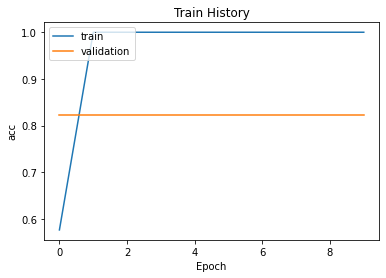

In [17]:
show_train_history(train_history,'acc','val_acc')

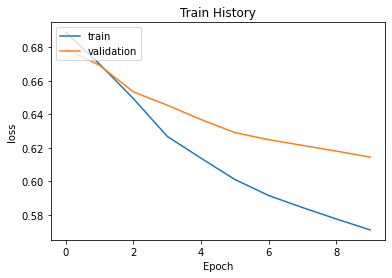

In [18]:
show_train_history(train_history,'loss','val_loss')

In [19]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

540/540 [==============================] - 0s 188us/step

accuracy= 0.9629629636252368


In [20]:
prediction=model.predict_classes(x_Test)

In [21]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0
label,
0.0,520
1.0,20


In [23]:
y_test_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.